## Scrape the Location Counts

In [90]:
import pandas as pd

# Website didn't load
df_coffee = pd.read_csv('./Data/lab4.csv')
df_coffee.head()

,State,Coffee Chain,State Abbreviation,Location Count,Population
0,Alaska,Starbucks,AK,24,733391
1,Alabama,Starbucks,AL,73,5024279
2,Arkansas,Starbucks,AR,33,3011524
3,Arizona,Starbucks,AZ,279,7151502
4,California,Starbucks,CA,2362,39538223


In [91]:
df_coffee.drop(columns=['State Abbreviation', 'Population'], inplace=True)
df_coffee.head()

,State,Coffee Chain,Location Count
0,Alaska,Starbucks,24
1,Alabama,Starbucks,73
2,Arkansas,Starbucks,33
3,Arizona,Starbucks,279
4,California,Starbucks,2362


In [46]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [92]:
def stateabb(state):
    return us_state_abbrev.get(state, state)

df_coffee['State'] = df_coffee['State'].apply(lambda x: stateabb(x))
df_coffee.head()

,State,Coffee Chain,Location Count
0,AK,Starbucks,24
1,AL,Starbucks,73
2,AR,Starbucks,33
3,AZ,Starbucks,279
4,CA,Starbucks,2362


## Supplemental Data

In [48]:
import requests
from bs4 import BeautifulSoup

response = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")
soup = BeautifulSoup(response.content, "html.parser")

In [20]:
table = soup.find_all("table")[0]

In [41]:
rows = []
for row in table.find_all('tr')[1:57]:
    cells = row.find_all('td')
    state = cells[2].text[1:-1]
    pop = cells[3].text[:-1].replace(',', '')

    rows.append({"State": stateabb(state),
                 "Population": int(pop)})

In [42]:
df_population = pd.DataFrame(rows)
df_population.head()

,State,Population
0,CA,39538223
1,TX,29145505
2,FL,21538187
3,NY,20201249
4,PA,13002700


In [93]:
df_coffee = df_coffee.merge(df_population, on="State")
df_coffee.head()

,State,Coffee Chain,Location Count,Population
0,AK,Starbucks,24,733391
1,AK,McDonald's,33,733391
2,AL,Starbucks,73,5024279
3,AL,Dunkin' Donuts,1,5024279
4,AL,Panera Bread,20,5024279


In [96]:
df_coffee['Coffee Chain'].value_counts()

Coffee Chain
Starbucks                     51
McDonald's                    51
Panera Bread                  46
Dunkin' Donuts                45
Au Bon Pain                   22
Caribou Coffee                20
Tim Horton's                  16
Peet's Coffee & Tea           10
The Coffee Bean & Tea Leaf     8
Name: count, dtype: int64

In [95]:
stock_prices = {
    "Starbucks": 92.24,
    "Dunkin\' Donuts": 106.48,
    "Peet's Coffee & Tea": 69.12,
    "Tim Horton\'s": 99.00,
    "Panera Bread": 314.93,
    "Caribou Coffee": 16.49,
    "Au Bon Pain": 0.32,
    "The Coffee Bean & Tea Leaf": 3.62,
    "McDonald\'s": 262.17
}

In [97]:
df_stock = pd.DataFrame(list(stock_prices.items()), columns=['Coffee Chain', 'Stock Price'])
df_stock

,Coffee Chain,Stock Price
0,Starbucks,92.24
1,Dunkin' Donuts,106.48
2,Peet's Coffee & Tea,69.12
3,Tim Horton's,99.00
4,Panera Bread,314.93
5,Caribou Coffee,16.49
6,Au Bon Pain,0.32
7,The Coffee Bean & Tea Leaf,3.62
8,McDonald's,262.17


In [98]:
df_coffee = df_coffee.merge(df_stock, on="Coffee Chain")
df_coffee.head()

,State,Coffee Chain,Location Count,Population,Stock Price
0,AK,Starbucks,24,733391,92.24
1,AL,Starbucks,73,5024279,92.24
2,AR,Starbucks,33,3011524,92.24
3,AZ,Starbucks,279,7151502,92.24
4,CA,Starbucks,2362,39538223,92.24


In [103]:
region_dict = {
    'CT': 'Northeast',
    'ME': 'Northeast',
    'MA': 'Northeast',
    'NH': 'Northeast',
    'RI': 'Northeast',
    'VT': 'Northeast',
    'NJ': 'Northeast',
    'NY': 'Northeast',
    'PA': 'Northeast',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'MI': 'Midwest',
    'OH': 'Midwest',
    'WI': 'Midwest',
    'IA': 'Midwest',
    'KS': 'Midwest',
    'MN': 'Midwest',
    'MO': 'Midwest',
    'NE': 'Midwest',
    'ND': 'Midwest',
    'SD': 'Midwest',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'MD': 'South',
    'NC': 'South',
    'SC': 'South',
    'VA': 'South',
    'DC': 'South',
    'WV': 'South',
    'AL': 'South',
    'KY': 'South',
    'MS': 'South',
    'TN': 'South',
    'AR': 'South',
    'LA': 'South',
    'OK': 'South',
    'TX': 'South',
    'AZ': 'West',
    'CO': 'West',
    'ID': 'West',
    'MT': 'West',
    'NV': 'West',
    'NM': 'West',
    'UT': 'West',
    'WY': 'West',
    'AK': 'West',
    'CA': 'West',
    'HI': 'West',
    'OR': 'West',
    'WA': 'West',
}

In [104]:
df_coffee['Region'] = df_coffee['State'].map(region_dict)
df_coffee.head()

,State,Coffee Chain,Location Count,Population,Stock Price,Region
0,AK,Starbucks,24,733391,92.24,West
1,AL,Starbucks,73,5024279,92.24,South
2,AR,Starbucks,33,3011524,92.24,South
3,AZ,Starbucks,279,7151502,92.24,West
4,CA,Starbucks,2362,39538223,92.24,West


## Analyze

In [100]:
df_coffee.groupby('Coffee Chain')['Location Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Coffee Chain,,,,,,,,
Au Bon Pain,22.0,15.090909,17.647094,1.0,5.25,8.5,19.75,67.0
Caribou Coffee,20.0,31.150000,68.800455,1.0,5.00,9.0,25.25,312.0
Dunkin' Donuts,45.0,144.022222,254.282367,1.0,7.00,34.0,142.00,1101.0
McDonald's,51.0,329.039216,337.564866,29.0,82.00,237.0,404.00,1623.0
Panera Bread,46.0,51.695652,57.254935,1.0,9.75,28.5,75.50,227.0
Peet's Coffee & Tea,10.0,20.400000,50.273032,1.0,1.50,3.0,7.75,163.0
Starbucks,51.0,201.843137,353.020360,6.0,31.50,76.0,230.00,2362.0
The Coffee Bean & Tea Leaf,8.0,31.000000,58.969726,1.0,1.75,12.0,22.25,175.0
Tim Horton's,16.0,31.250000,53.932674,1.0,2.75,7.0,26.25,191.0


In [107]:
df_coffee.groupby('Region')['Location Count'].sum().sort_values(ascending=False)

Region
South        11910
West          8757
Midwest       8513
Northeast     8504
Name: Location Count, dtype: int64

In [108]:
df_coffee.groupby('Region')['Population'].sum().sort_values(ascending=False)

Region
South        735877600
Midwest      449933953
West         429178914
Northeast    376026522
Name: Population, dtype: int64

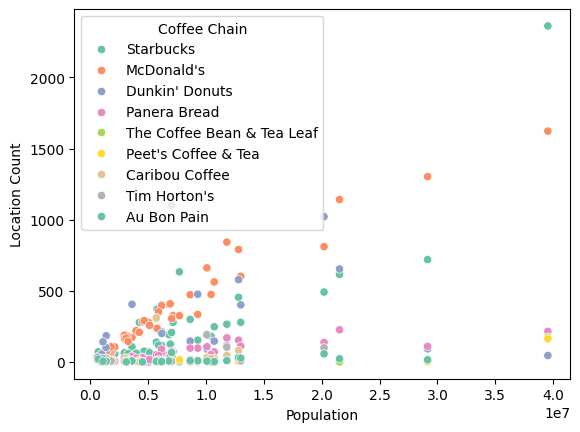

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_coffee, x='Population', y='Location Count', hue='Coffee Chain', palette='Set2')
plt.xlabel('Population')
plt.ylabel('Location Count')

plt.show()

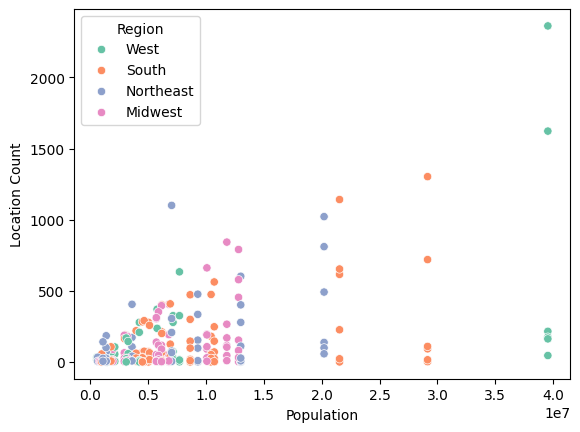

In [114]:
sns.scatterplot(data=df_coffee, x='Population', y='Location Count', hue='Region', palette='Set2')
plt.xlabel('Population')
plt.ylabel('Location Count')

plt.show()

In [122]:
df_coffee['Normalized'] = df_coffee['Location Count'] / df_coffee['Population']
df_coffee.groupby(['Region', 'Coffee Chain'])['Normalized'].mean().unstack()

Coffee Chain,Au Bon Pain,Caribou Coffee,Dunkin' Donuts,McDonald's,Panera Bread,Peet's Coffee & Tea,Starbucks,The Coffee Bean & Tea Leaf,Tim Horton's
Region,,,,,,,,,
Midwest,1.080507e-06,7.687830e-06,0.000009,0.000057,0.000009,2.341462e-07,0.000021,NaN,0.000006
Northeast,3.550941e-06,4.614426e-07,0.000088,0.000045,0.000009,5.363257e-07,0.000020,NaN,0.000008
South,7.890606e-07,2.120663e-06,0.000012,0.000055,0.000006,1.029318e-07,0.000019,1.251203e-07,0.000001
West,3.221012e-07,8.973952e-07,0.000003,0.000047,0.000004,1.559400e-06,0.000044,7.402167e-06,NaN
